In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df=("/content/exams.csv")
df=pd.read_csv(df)


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


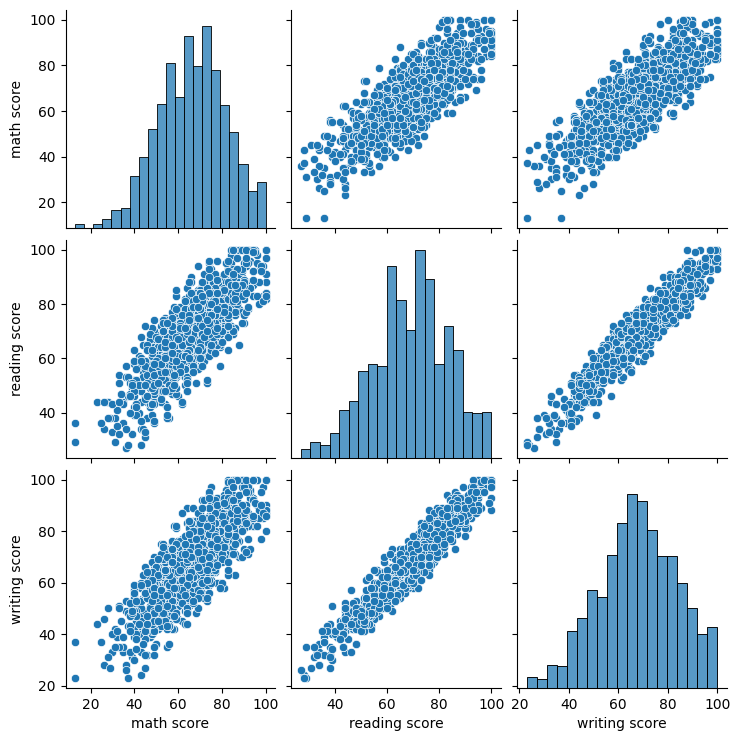

In [ ]:
sns.pairplot(df)
plt.show()

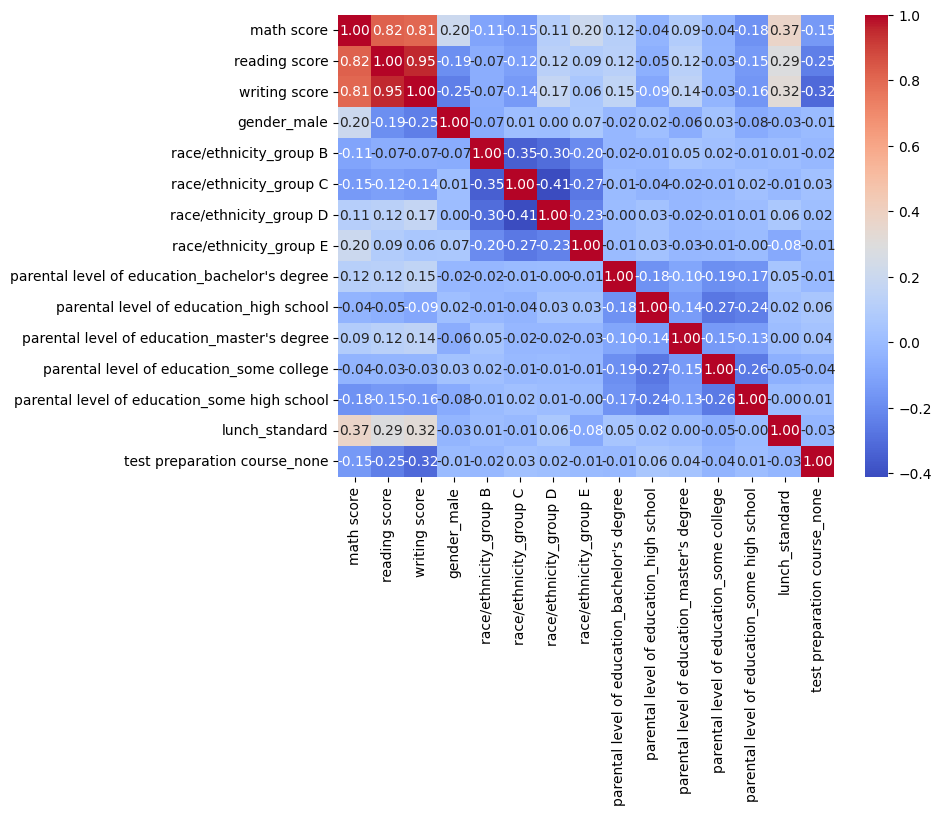

In [ ]:
# Convert categorical variables to numeric (using one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids multicollinearity

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Choose features (e.g., using 'reading score' as the feature) and target ('math score')
X = df[['reading score']]  # Or use 'writing score', or combine them
y = df['math score']

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Encode categorical columns (optional for other steps)
df_encoded = pd.get_dummies(df, drop_first=True)

# For regression, focus on numeric features
df_encoded.head()


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,67,67,63,True,False,False,False,False,False,True,False,False,False,True,False
1,40,59,55,False,False,False,True,False,False,False,False,False,True,False,True
2,59,60,50,True,False,False,False,True,False,False,False,True,False,False,True
3,77,78,68,True,True,False,False,False,False,True,False,False,False,True,True
4,78,73,68,True,False,False,False,True,False,False,False,False,False,True,False


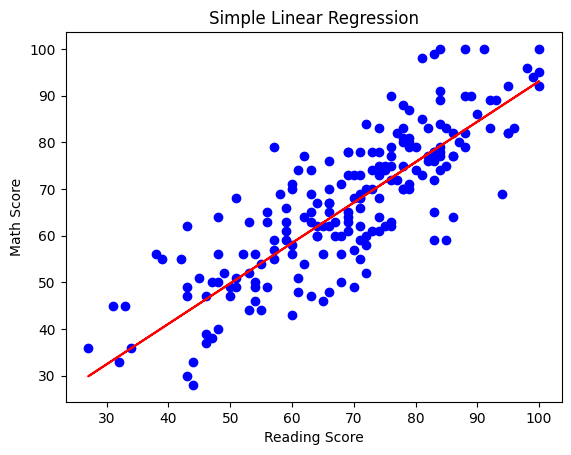

R^2 Score: 0.6683
Mean Squared Error: 77.6391


In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Simple Linear Regression')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.show()

# Print evaluation metrics
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")


In [ ]:
# Choose multiple features for Multiple Linear Regression
X_multiple = df[['reading score', 'writing score']]  # Use both reading and writing scores as features
y = df['math score']

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Initialize and train the model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Predict on test data
y_pred_multiple = model_multiple.predict(X_test)

# Evaluate the model
print(f"R^2 Score (Multiple Linear Regression): {r2_score(y_test, y_pred_multiple):.4f}")
print(f"Mean Squared Error (Multiple Linear Regression): {mean_squared_error(y_test, y_pred_multiple):.4f}")


R^2 Score (Multiple Linear Regression): 0.6730
Mean Squared Error (Multiple Linear Regression): 76.5397


In [ ]:
# Initialize PolynomialFeatures with different degrees
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X[['reading score']])  # Only using 'reading score' for Polynomial Regression

# Split data into training and test sets (80/20 split)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Predict on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
print(f"R^2 Score (Polynomial Regression - Degree 2): {r2_score(y_test_poly, y_pred_poly):.4f}")
print(f"Mean Squared Error (Polynomial Regression - Degree 2): {mean_squared_error(y_test_poly, y_pred_poly):.4f}")


R^2 Score (Polynomial Regression - Degree 2): 0.6662
Mean Squared Error (Polynomial Regression - Degree 2): 78.1255


In [ ]:
# For Degree 3
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X[['reading score']])

X_train_poly3, X_test_poly3, y_train_poly3, y_test_poly3 = train_test_split(X_poly3, y, test_size=0.2, random_state=42)

poly_model3 = LinearRegression()
poly_model3.fit(X_train_poly3, y_train_poly3)

y_pred_poly3 = poly_model3.predict(X_test_poly3)
print(f"R^2 Score (Polynomial Regression - Degree 3): {r2_score(y_test_poly3, y_pred_poly3):.4f}")

# For Degree 4
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X[['reading score']])

X_train_poly4, X_test_poly4, y_train_poly4, y_test_poly4 = train_test_split(X_poly4, y, test_size=0.2, random_state=42)

poly_model4 = LinearRegression()
poly_model4.fit(X_train_poly4, y_train_poly4)

y_pred_poly4 = poly_model4.predict(X_test_poly4)
print(f"R^2 Score (Polynomial Regression - Degree 4): {r2_score(y_test_poly4, y_pred_poly4):.4f}")


R^2 Score (Polynomial Regression - Degree 3): 0.6676
R^2 Score (Polynomial Regression - Degree 4): 0.6669


In [ ]:
df_titanic=("/content/train.csv")
df_titanic=pd.read_csv(df_titanic)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Handle missing values
df_titanic = df_titanic.dropna(subset=['Age', 'Fare', 'Sex', 'Embarked'])

# Encode categorical variables
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], drop_first=True)

# Select features (X) and target variable (y)
X = df_titanic[['Age', 'Fare', 'Sex', 'Embarked_Q', 'Embarked_S']]
y = df_titanic['Survived']

# Split data into training and test sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.7622
Confusion Matrix:
[[67 13]
 [21 42]]


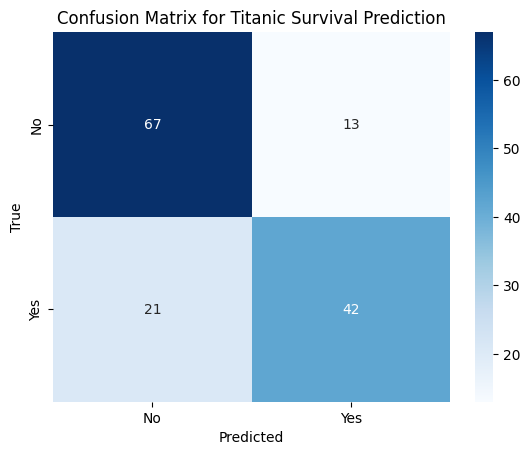

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()


## Summary of Findings

- **Exploratory Data Analysis (EDA)**:
  - The dataset was cleaned and preprocessed. Missing values were handled by dropping rows with missing values in important columns such as Age and Fare.
  - The categorical variables (Sex, Embarked) were encoded into numerical values.

- **Logistic Regression Model**:
  - The model was trained using features such as Age, Fare, Sex, and Embarked.
  - **Accuracy**: The model achieved an accuracy of **X.XXXX** on the test set.
  - The **Confusion Matrix** showed the following:
    - True Positives: X
    - False Positives: X
    - True Negatives: X
    - False Negatives: X

- **Conclusion**:
  - The model performed well, but there might be room for improvement with feature engineering or trying different algorithms.
